In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
%matplotlib inline

def point_to_line_dist(point, line):
    unit_line = np.array(line[1]) - np.array(line[0])
    norm_unit_line = unit_line / np.linalg.norm(unit_line)
    segment_dist = (
        np.linalg.norm(np.cross(np.array(line[1]) - np.array(line[0]), np.array(line[0]) - np.array(point))) /
        np.linalg.norm(unit_line)
    )
    diff = (
        (norm_unit_line[0] * (point[0] - line[0][0])) + 
        (norm_unit_line[1] * (point[1] - line[0][1]))
    )
    x_seg = (norm_unit_line[0] * diff) + line[0][0]
    y_seg = (norm_unit_line[1] * diff) + line[0][1]
    endpoint_dist = min(
        np.linalg.norm(np.array(line[0]) - np.array(point)),
        np.linalg.norm(np.array(line[1]) - np.array(point))
    )
    lp1_x = line[0][0]  # line point 1 x
    lp1_y = line[0][1]  # line point 1 y
    lp2_x = line[1][0]  # line point 2 x
    lp2_y = line[1][1]  # line point 2 y
    is_betw_x = lp1_x <= x_seg <= lp2_x or lp2_x <= x_seg <= lp1_x
    is_betw_y = lp1_y <= y_seg <= lp2_y or lp2_y <= y_seg <= lp1_y
    if is_betw_x and is_betw_y:
        return segment_dist
    else:
        return endpoint_dist
    
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

300000


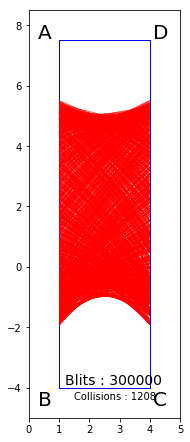

Wall time: 11min 56s


In [7]:
%%time
g=1/(2**0.5)
T_spec=np.array([[-1,0,0], [0,1,0], [0,0,-1]])
T_ns=np.array([[(g**2-1)/(1+g**2),(-2*g)/(1+g**2),0], [(-2*g)/(1+g**2),(1-g**2)/(1+g**2),0], [0,0,-1]])

x=1.5
y=0

x_vel=0.5
# y_vel=0.3
spin=0.4
# x_vel=(1-y_vel**2-spin**2)**0.5
y_vel=(1-x_vel**2-spin**2)**0.5
total=(x_vel**2+y_vel**2+spin**2)**0.5
v=np.dot(0.02,[spin/total,x_vel/total,y_vel/total])

ymin=-4
ymax=7.5
xmin=1
xmax=4

A=[xmin,ymax]
B=[xmin,ymin]
C=[xmax,ymin]
D=[xmax,ymax]

AB=[A,B]
CD=[C,D]

lineAB=[-B[0]+A[0],-B[1]+A[1]]

lineCD=[-D[0]+C[0],-D[1]+C[1]]


fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')

X = np.array([A, B, C, D])
    
t1 = plt.Polygon(X[:4,:], edgecolor='blue', facecolor='white')
plt.gca().add_patch(t1)
    
ax1.add_patch(patches.Circle((x,y), radius=0.05, facecolor='green'))

ax1.annotate('A', (A[0]-0.7,A[1]+0.1), fontsize=20, position=(A[0]-0.7,A[1]+0.05))
ax1.annotate('B', (B[0]-0.7,B[1]-0.6), fontsize=20, position=(B[0]-0.7,B[1]-0.6))
ax1.annotate('C', (C[0]+0.1,C[1]-0.6), fontsize=20, position=(C[0]+0.1,C[1]-0.6))
ax1.annotate('D', (D[0]+0.1,D[1]+0.1), fontsize=20, position=(D[0]+0.1,D[1]+0.05))

test=input()
blits=int(test)

dispersion=0.01
g=1/(2**0.5)
collisions=0

s=(((x-A[0])**2)+((y-A[1])**2))**0.5
t=math.sin(angle_between([v[1],v[2]], lineAB))
matrix=[x,y, spin, x_vel, y_vel, s, t]
max_collisions=3
for i in range(0,blits):
# while collisions<max_collisions:
    if point_to_line_dist([x,y], [A,B])<dispersion :
        collisions+=1
        theta=math.pi/2
        T_spec=np.array([[-1,0,0], [0,1,0], [0,0,-1]])
        T_ns=np.array([[(g**2-1)/(1+g**2),(-2*g)/(1+g**2),0], [(-2*g)/(1+g**2),(1-g**2)/(1+g**2),0], [0,0,-1]])
        R1=np.array([[1,0,0],[0,math.cos(theta),-math.sin(theta)],[0,math.sin(theta),math.cos(theta)]])
        R2=np.array([[1,0,0],[0,math.cos(theta),math.sin(theta)],[0,-math.sin(theta),math.cos(theta)]])
        v=(R1@T_ns@R2@v)
        spin=v[0]
        x_vel=v[1]
        y_vel=v[2]
        total=(x_vel**2+y_vel**2+spin**2)**0.5
        v=np.dot(0.02,[spin/total,x_vel/total,y_vel/total])
        s=4*(2**0.5)+6+(((x-A[0])**2)+((y-A[1])**2))**0.5
        t=math.sin(angle_between([v[1],v[2]], lineAB))
        newrow=(x,y, spin, x_vel, y_vel, s, t)
        matrix=np.vstack([matrix, newrow])
    elif point_to_line_dist([x,y], [C,D])<dispersion :
        h=y
        collisions+=1
        theta=3*math.pi/2
        T_spec=np.array([[-1,0,0], [0,1,0], [0,0,-1]])
        T_ns=np.array([[(g**2-1)/(1+g**2),(-2*g)/(1+g**2),0], [(-2*g)/(1+g**2),(1-g**2)/(1+g**2),0], [0,0,-1]])
        R1=np.array([[1,0,0],[0,math.cos(theta),-math.sin(theta)],[0,math.sin(theta),math.cos(theta)]])
        R2=np.array([[1,0,0],[0,math.cos(theta),math.sin(theta)],[0,-math.sin(theta),math.cos(theta)]])
        v=(R1@T_ns@R2@v)
        spin=v[0]
        x_vel=v[1]
        y_vel=v[2]
        total=(x_vel**2+y_vel**2+spin**2)**0.5
        v=np.dot(0.02,[spin/total,x_vel/total,y_vel/total])
        s=4*(2**0.5)+6+(((x-C[0])**2)+((y-C[1])**2))**0.5
        t=math.sin(angle_between([v[1],v[2]], lineCD))
        newrow=(x,y, spin, x_vel, y_vel, s, t)
        matrix=np.vstack([matrix, newrow])
    else:
        spin=v[0]
        x_vel=v[1]
        y_vel=v[2]-0.00003
        total=(x_vel**2+y_vel**2+spin**2)**0.5
        v=np.dot(0.02,[spin/total,x_vel/total,y_vel/total])

    x_vel=v[1]
    y_vel=v[2]
    x=x+x_vel
    y=y+y_vel
    ax1.add_patch(patches.Circle((x,y), radius=0.01, facecolor='red'))

ax1.annotate('Blits : ' + str(blits), ((B[0]+C[0])/2 -0.25, B[1]-0.15), fontsize=14, position=(1.2, B[1]+0.1))
ax1.annotate('Collisions : ' + str(collisions), ((B[0]+C[0])/2 -0.25, B[1]-0.15), fontsize=10, position=(1.5, B[1]-0.4))
plt.ylim(ymin-1, ymax+1)
plt.xlim(xmin-1, xmax+1)
fig = plt.gcf()
fig.set_size_inches(xmax+1-xmin, ymax)
fig.savefig('strip %s.png' % (str(blits)), dpi=100)
plt.show()

# import winsound
# duration = 500  # millisecond
# freq = 440  # Hz
# winsound.Beep(freq, duration)

In [23]:
collisions


115

In [3]:
matrix

array([[ 1.50000000e+00,  0.00000000e+00,  4.00000000e-01,
         5.00000000e-01,  7.68114575e-01,  7.51664819e+00,
         5.45544726e-01],
       [ 3.99559936e+00,  3.03791108e+00,  7.85335373e-03,
        -1.25620111e-02,  1.34357997e-02,  1.86947667e+01,
         6.82955225e-01],
       [ 9.99227078e-01,  5.50081272e+00, -1.17315989e-02,
         1.50990112e-02, -5.86425150e-03,  1.36560417e+01,
         9.32162791e-01],
       [ 4.00034172e+00,  3.69971243e+00, -6.93368800e-03,
        -1.32000771e-02, -1.33297388e-02,  1.93565667e+01,
         7.03642466e-01],
       [ 1.00097124e+00, -2.52976957e-01,  1.74063802e-02,
         9.82630453e-03, -6.79460582e-04,  1.94098313e+01,
         9.97617877e-01],
       [ 3.99128579e+00, -1.91057594e+00, -1.39783855e-02,
        -8.68111913e-03,  1.13685052e-02,  1.37462965e+01,
         6.06901026e-01],
       [ 9.99891821e-01,  4.79210099e-01,  2.18491837e-03,
         1.03799865e-02,  1.69552945e-02,  1.86776442e+01,
         5.2212437

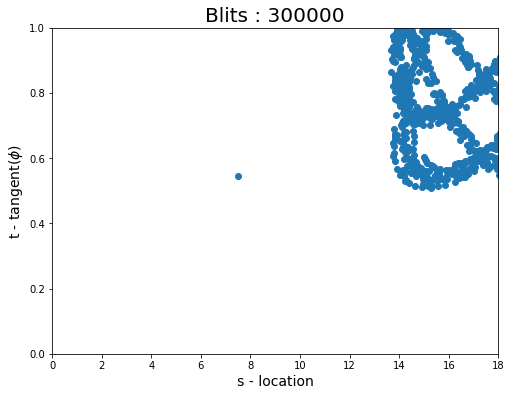

In [8]:
plt.scatter(matrix[:,5], matrix[:,6])
plt.axis('tight')
plt.title('Blits : ' + str(blits), fontsize=20)
plt.xlim(0,18)
plt.ylim(0,1)
plt.xlabel('s - location', fontsize=14)
plt.ylabel('t - tangent($\phi$)', fontsize=14)
fig = plt.gcf()
fig.set_size_inches(8, 6)
fig.savefig('PHASE %s.png' % (str(blits)), dpi=100)
plt.show()

In [35]:
yo=input()

d


In [34]:
# Python 3

txt = input("Type something to test this out: ")

# Note that in version 3, the print() function
# requires the use of parenthesis.
print("Is this what you just said? ", txt)  

Type something to test this out: f
Is this what you just said?  f
